In [1]:
import ast
import pandas as pd 
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns

#Loading dataset 
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

#data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [12]:
df_ind=df[df['job_country']=='India']

In [13]:
df_skills=df_ind.explode('job_skills')

In [20]:
df_skills_count=df_skills.groupby(['job_skills','job_title_short']).size().reset_index(name='skill_count')

In [ ]:
df_skills_count.sort_values(by='skill_count',ascending=False,inplace=True)  

In [64]:
df_job_title_count=df_ind['job_title_short'].value_counts().reset_index(name='job_total')

In [71]:
df_skills_perc=pd.merge(df_skills_count,df_job_title_count,how='left',on='job_title_short')
df_skills_perc['skill_perc']=100*df_skills_perc['skill_count']/df_skills_perc['job_total']
df_skills_perc

,job_skills,job_title_short,skill_count,job_total,skill_perc
0,sql,Data Engineer,12993,19062,68.161788
1,python,Data Engineer,11568,19062,60.686182
2,python,Data Scientist,9248,13279,69.643798
3,spark,Data Engineer,7157,19062,37.545903
4,aws,Data Engineer,6993,19062,36.685552
...,...,...,...,...,...
1684,angular.js,Data Scientist,1,13279,0.007531
1685,arch,Business Analyst,1,1887,0.052994
1686,mlpack,Data Engineer,1,19062,0.005246
1687,yarn,Senior Data Scientist,1,2486,0.040225


In [40]:
job_titles=df_skills_count['job_title_short'].unique().tolist()

In [42]:
job_titles=sorted(job_titles[:3])


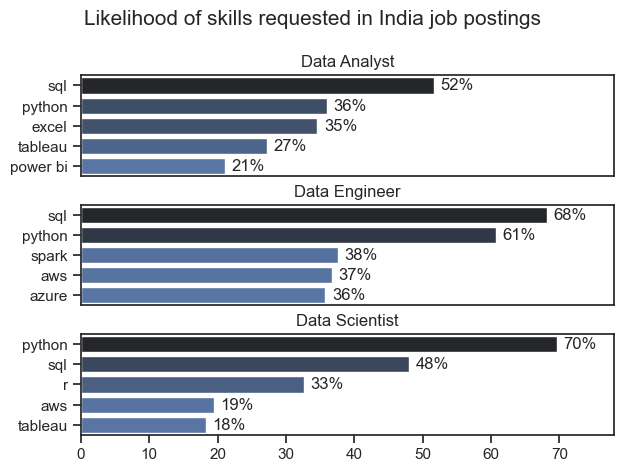

In [97]:
fig,ax=plt.subplots(len(job_titles),1)

for i,job_title in enumerate(job_titles):
    df_plot=df_skills_perc[df_skills_perc['job_title_short']==job_title].head(5)
    sns.barplot(data=df_plot,y='job_skills',x='skill_perc',ax=ax[i],hue='skill_perc',palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,78)
    for n,v in enumerate(df_plot['skill_perc']):
        ax[i].text(v+1,n,f'{v:.0f}%',va='center')
    if i!=len(job_titles)-1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of skills requested in India job postings',fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()
sns.set_theme(style="ticks")